## Resume Analysis using spaCy

In [58]:
#spacy
import spacy
from spacy.pipeline import EntityRuler
from spacy.lang.en import English
from spacy.tokens import Doc

#Visualization
from spacy import displacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

#Data loading/ Data manipulation
import pandas as pd
import numpy as np
import jsonlines

#nltk
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download(['stopwords','wordnet'])

#warning
import warnings 
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to C:\Users\BIDISHA
[nltk_data]     ADHIKARI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\BIDISHA
[nltk_data]     ADHIKARI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [87]:
df=pd.read_csv(r'G:\Spaatech\Resume\Resume.csv')
df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [61]:
## loading spacy model

nlp = spacy.load("en_core_web_sm")
skill_pattern_path = "jz_skill_patterns.jsonl"    ## from jobzilla skill jsonl file

In [62]:
print(skill_pattern_path)

jz_skill_patterns.jsonl


In [63]:
## Entity Ruler

ruler = nlp.add_pipe("entity_ruler")
ruler.from_disk(skill_pattern_path)
nlp.pipe_names

['tok2vec',
 'tagger',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'ner',
 'entity_ruler']

In [64]:
## Skills

def get_skills(text):     ##is going to extract skills from a single text.
    doc = nlp(text)
    myset = []
    subset = []
    for ent in doc.ents:
        if ent.label_ == "SKILL":
            subset.append(ent.text)
    myset.append(subset)
    return subset


def unique_skills(x):     ## will remove duplicates.
    return list(set(x))

In [65]:
## Cleaning resume text  using nltk and regex

clean = []
for i in range(df.shape[0]):
    review = re.sub(
        '(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?"',
        " ",
        df["Resume_str"].iloc[i],
    )
    review = review.lower()
    review = review.split()
    lm = WordNetLemmatizer()
    review = [
        lm.lemmatize(word)
        for word in review
        if not word in set(stopwords.words("english"))
    ]
    review = " ".join(review)
    clean.append(review)


In [66]:
## Applying functions 

df["Clean_Resume"] = clean
df["skills"] = df["Clean_Resume"].str.lower().apply(get_skills)
df["skills"] = df["skills"].apply(unique_skills)
df.head()

,ID,Resume_str,Resume_html,Category,Clean_Resume,skills
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr administrator marketing associate hr admini...,"[server, business, front end, documentation, d..."
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR,hr specialist u hr operation summary versatile...,"[adobe photoshop, business, advertising, suppo..."
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr director summary 20 year experience recruit...,"[business, tracking system, box, security, adv..."
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr specialist summary dedicated driven dynamic...,"[process management, documentation, certificat..."
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr manager skill highlight hr skill hr departm...,"[business, business administration, box, suppo..."


In [67]:
df.columns

Index(['ID', 'Resume_str', 'Resume_html', 'Category', 'Clean_Resume',
       'skills'],
      dtype='object')

<AxesSubplot:xlabel='count', ylabel='Category'>

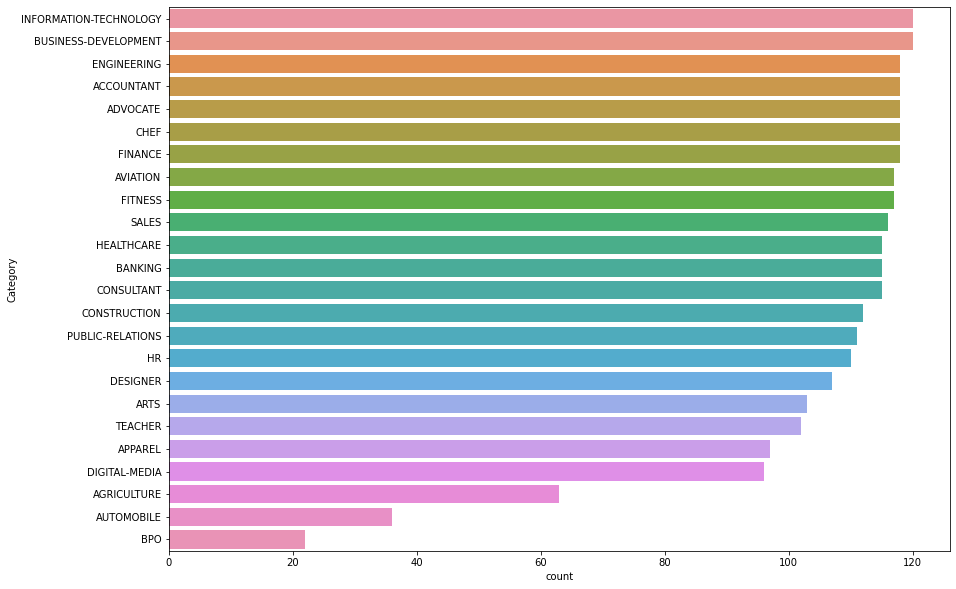

In [89]:
plt.figure(figsize=(14,10))
sns.countplot(y='Category',
              data=df,
             order = df['Category'].value_counts().index)

#Business Development and Information Technology are the top categories.

In [73]:
Job_cat = df["Category"].unique()
Job_cat = np.append(Job_cat,'ALL')

In [74]:
Job_cat

array(['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE',
       'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE',
       'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT',
       'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION',
       'ALL'], dtype=object)

Text(0.5, 1.0, "Most Used Words in ['HR' 'DESIGNER' 'INFORMATION-TECHNOLOGY' 'TEACHER' 'ADVOCATE'\n 'BUSINESS-DEVELOPMENT' 'HEALTHCARE' 'FITNESS' 'AGRICULTURE' 'BPO' 'SALES'\n 'CONSULTANT' 'DIGITAL-MEDIA' 'AUTOMOBILE' 'CHEF' 'FINANCE' 'APPAREL'\n 'ENGINEERING' 'ACCOUNTANT' 'CONSTRUCTION' 'PUBLIC-RELATIONS' 'BANKING'\n 'ARTS' 'AVIATION' 'ALL'] Resume")

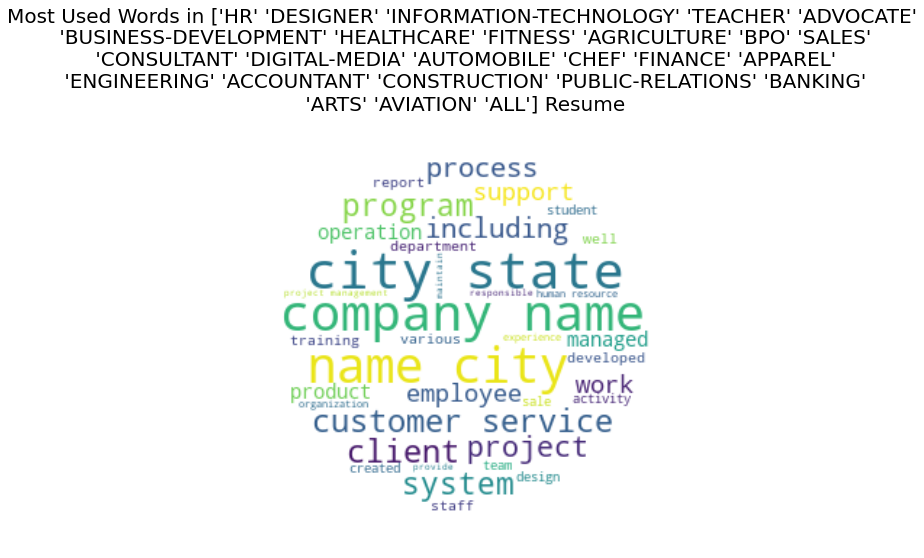

In [75]:
## Showing Most used words in Clean Resumes uisng WordCloud

text = ""
for i in df["Clean_Resume"].values:
    text += i + " "

plt.figure(figsize=(8, 8))

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(
    width=800,
    height=800,
    background_color="white",
    min_font_size=6,
    repeat=True,
    mask=mask,
)
wc.generate(text)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.title(f"Most Used Words in {Job_cat} Resume", fontsize=20)

In [76]:
## entity Recognizer

sent = nlp(df["Resume_str"].iloc[15])
displacy.render(sent, style="ent", jupyter=True)

In [77]:
# Dependency Parsing
displacy.render(sent[0:10], style="dep", jupyter=True, options={"distance": 90})


In [78]:
patterns = df.Category.unique()
for a in patterns:
    ruler.add_patterns([{"label": "Job-cat", "pattern": a}])

In [79]:
# testing on first resume from the dataset
# options=[{"ents": "Job-Category", "colors": "#ff3232"},{"ents": "SKILL", "colors": "#56c426"}]
colors = {
    "Job-cat": "linear-gradient(90deg, #aa9cfc, #fc9ce7)",
    "SKILL": "linear-gradient(90deg, #9BE15D, #00E3AE)",
    "ORG": "#ffd966",
    "PERSON": "#e06666",
    "GPE": "#9fc5e8",
    "DATE": "#c27ba0",
    "ORDINAL": "#674ea7",
    "PRODUCT": "#f9cb9c",
}
options = {
    "ents": [
        "Job-cat",
        "SKILL",
        "ORG",
        "PERSON",
        "GPE",
        "DATE",
        "ORDINAL",
        "PRODUCT",
    ],
    "colors": colors,
}
sent = nlp(df["Resume_str"].iloc[0])
displacy.render(sent, style="ent", jupyter=True, options=options)

In [80]:
## adding some extra patterns 
patterns = [
    {"label": "ORG", "pattern": "Maulana Abul Kalam Azad University Of Technology"},
    {"label": "GPE", "pattern": "Kulgachia, Howrah  West Bengal"},
    {"label": "PERSON", "pattern": "Bidisha Adhikari"},
    {"label": "ORG", "pattern": "MAKAUT"},
    {"label":"SKILL", "pattern":"Machine Learning"},
    {"label": "ORG", "pattern": "EdX"},
    {"label": "ORG", "pattern": "WBCHSE"},
    {"label": "ORG", "pattern": "Bagnan Adarsha Balika Vidyalaya"},
    {"label": "PHONE NUMBER", "pattern": "+919874051938"},
    {"label": "EMAIL", "pattern": "bidishaadhikari2015@gmail.com"},
    {"label": "PORTFOLIO", "pattern": "linkedin.com/in/bidisha-adhikari-53273621a"}
    
     ]

ruler.add_patterns(patterns)

In [81]:

colors = {
    "Job-cat": "linear-gradient(90deg, #aa9cfc, #fc9ce7)",
    "SKILL": "linear-gradient(90deg, #9BE15D, #00E3AE)",
    "ORG": "#ffd966",
    "PERSON": "#e06666",
    "GPE": "#9fc5e8",
    "DATE": "#c27ba0",
    "PHONE NUMBER": "#674ea7",
    "EMAIL": "#f9cb9c",
    "PORTFOLIO":"#BFD374"
}
options = {
    "ents": [
        "Job-cat",
        "SKILL",
        "ORG",
        "PERSON",
        "GPE",
        "DATE",
        "PHONE NUMBER",
        "EMAIL",
        "PORTFOLIO"
    ],
    "colors": colors,
}
sent = nlp(df["Resume_str"].iloc[10])
displacy.render(sent, style="ent", jupyter=True, options=options)

#Testing on my resume

In [82]:
# Testing on a resume
# converting PDF to text
import sys, fitz
fname=r'G:\CV\Bidisha Adhikari.pdf'
doc=fitz.open(fname)
text=""
for page in doc:
    text = text + str(page.get_text())
tx = " ".join(text.split('\n'))
print(tx)

Ph. No.: +919874051938  E-mail: bidishaadhikari2015@gmail.com  LinkedIn Profile: linkedin.com/in/bidisha-adhikari-53273621a  Kulgachia, Howrah  West Bengal -711306  Bidisha Adhikari    Career Objective:   Currently studying in M.Sc. in IT (Data Science) 4th semester and seeking for an opportunity to explore and  utilize my good knowledge in    Machine Learning algorithm   Data Visualization techniques using python   Coding skills   Data Science   Exploratory Data Analysis  Technical Skills:   Programming Languages – C, Java, Python   Web Technologies – HTML, SQL, MongoDB, Cassandra    Academic Details:  Program  Institute  Board/ University  Marks  Year of Passing  M.Sc. in IT(Data  Science)  Maulana Abul  Kalam Azad  University Of  Technology, West  Bengal(In-House)  Maulana Abul  Kalam Azad  University Of  Technology, West  Bengal    9.47 YGPA(1st  year)  Due To Appear  B.Sc. in Computer  Science(H)  Panskura  Banamali College  Vidyasagar  University, West  Bengal  7.06 CGPA  

In [83]:
### Using my resume
## import sys, fitz

input_resume=tx
sent2 = nlp(input_resume)
displacy.render(sent2, style="ent", jupyter=True, options=options)

In [84]:
doc = nlp(tx)
for ent in doc.ents:
    print(f'{ent.label_.upper():{30}}- {ent.text}')

PHONE NUMBER                  - +919874051938
EMAIL                         - bidishaadhikari2015@gmail.com
PORTFOLIO                     - linkedin.com/in/bidisha-adhikari-53273621a
PERSON                        - Howrah  West Bengal
PERSON                        - Bidisha Adhikari
FAC                           - Career Objective
GPE                           - M.Sc
SKILL                         - Data Science
ORDINAL                       - 4th
CARDINAL                      - 
ORG                           - Machine Learning
SKILL                         - algorithm
ORG                           - Data Visualization
SKILL                         - python
CARDINAL                      - 
ORG                           -  Data Science   Exploratory Data Analysis  Technical Skills
ORG                           -  Programming Languages – C
SKILL                         - Java
SKILL                         - Python
SKILL                         - HTML
ORG                           - S

# Skill matcher

In [37]:
#setting some required skills 
input_skills="Data Science,Data Analysis,Database,SQL,Machine Learning,tableau"      ## string input
input_skills

'Data Science,Data Analysis,Database,SQL,Machine Learning,tableau'

In [38]:
# Matching with my resume
req_skills = input_skills.lower().split(",")
resume_skills = unique_skills(get_skills(input_resume.lower()))
score = 0
for x in req_skills:
    if x in resume_skills:
        score += 1
req_skills_len = len(req_skills)
match = round(score / req_skills_len * 100, 1)

print(f"The current Resume is {match}% matched to your requirements")

The current Resume is 50.0% matched to your requirements


In [48]:
# printing my skills
print(resume_skills)

['data science', 'machine learning', 'data visualization', 'data analysis', 'decision tree', 'exploratory data analysis', 'java', 'cassandra', 'random forest', 'python', 'languages', 'algorithm', 'mongodb']
